# Логистическая регрессия

## Kлассификация

Задача классификации (classification) — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является категориальным.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/f1c52bc11a0e81a47e3096dfb2750fdc/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml1-3_9.png)

Когда классов, которые мы хотим предсказать, только два, классификация называется **бинарной**. Например, мы можем предсказать, болен ли пациент раком, является ли изображение человеческим лицом, является ли письмо спамом и т. д.

Когда классов, которые мы хотим предсказать, более двух, классификация называется **мультиклассовой (многоклассовой)**. Например, предсказание модели самолёта по радиолокационным снимкам, классификация животных на фотографиях, определение языка, на котором говорит пользователь, разделение писем на группы.

Ниже представлены примеры разделяющих поверхностей, которые производят бинарную классификацию. Красным и синим цветом обозначены классы, зелёным — собственно поверхность, которая делит пространство признаков на две части. В каждой из этих частей находятся только наблюдения определённого класса.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/295dc860fdc114b9449701a16f7b6200/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-2_1.png)

Модели, которые решают задачу классификации, называются **классификаторами (classifier)**.

Если взять в качестве разделяющей поверхности некоторую плоскость (ровная поверхность на первом рисунке), то мы получаем модель логистической регрессии, которая тесно связана с рассмотренной нами ранее линейной регрессией.

Давайте для начала вспомним, как выглядит уравнение модели линейной регрессии в общем случае:

$\hat y = w_0 + w_1x_1 + w_2x_2 + ... + w_mx_m = w_0 + \sum \limits^{m}_{j=1}w_jx_j$

В общем случае это уравнение гиперплоскости, которая стремится приблизить зависимость целевой переменной от $m$ факторов.

* Когда фактор всего один, уравнение задаёт прямую:
$\hat y = w_0 +w_1x$

* Когда факторов два, уравнение задаёт плоскость:
$\hat y = w_0 +w_1x_1 + w_2x_2$

Но всё это работает только в том случае, когда целевой признак $y$, который мы хотим предсказать, является числовым, например цена, вес, время аренды и т. д.

<center> ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

**Логистическая регрессия (Logistic Regression)** — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.

В основе логистической регрессии лежит логистическая функция **(logistic function)** $\sigma (z)$ — отсюда и название модели. Однако более распространённое название этой функции — **сигмόида (sigmoid)**. Записывается она следующим образом:

$\sigma (z) = {1 \over {1 + e^{-z}}}$

В основе логистической регрессии лежит логистическая функция **(logistic function)** $\sigma$ — отсюда и название модели. Однако более распространённое название этой функции — сигмόида (sigmoid). Записывается она следующим образом:

$\sigma (z) = {1 \over {1 + e^{-z}}}$

А вот график зависимости сигмоиды от аргумента $z$:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/17e5df54243ab349c94672502f9f4dd0/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-2_3.png)

В чём преимущество этой функции?

У сигмоиды есть два очень важных для нас свойства:

* Значения сигмоиды $\sigma (z)$ лежат в диапазоне от 0 до 1 при любых значения аргумента $z$: какой бы $z$ вы ни подставили, число меньше 0 или больше 1 вы не получите.
* Сигмоида выдаёт значения $\sigma (z) > 0.5$ при её аргументе $z > 0$, $\sigma (z) < 0.5$ — при $z < 0$ и $\sigma (z) = 0.5$ — при $z = 0$.

Для бинарной классификации описанное выше будет выглядеть следующим образом:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/8e663f443f23b393252ae85246b5d23f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-2_4.png)

Рассмотрим, как это работает, на примере.

Пусть мы каким-то образом обучили модель линейной регрессии предсказывать положительные числа для спам-писем и отрицательные — для обычных писем.

Подаём характеристики письма $x_1, x_2, ..., x_m$ в выражение для линейной регрессии и получаем ответ модели, например $z = 1.5$. Тогда, подставив его в сигмоиду, получим:

$\hat P = \sigma (z) = {1 \over {1 + e^{-z}}} = {1 \over {1 + e^{-1.5}}} = 0.82$

Таким образом, вероятность того, что данный объект принадлежит классу спама, равна 0.82, что больше порогового значения 0.5. То есть мы относим данное письмо к спаму: $\hat y = 1$.

Пусть теперь мы подали на вход модели характеристики другого письма и получили $z = -0.91$. Тогда, подставив этот результат в сигмоиду, получим:

$\hat P = \sigma (z) = {1 \over {1 + e^{-z}}} = {1 \over {1 + e^{0.91}}} = 0.28$

Вероятность того, что данный объект принадлежит классу спама, равна 0.28, что меньше порогового значения 0.5. Мы относим данное письмо к обычным письмам: $\hat = 0$.

Кстати, вероятность того, что это письмо будет обычным, равна противоположной вероятности: $Q = 1 - 0.28 = 0.72$. 

Полученное выражение для оценки вероятности $\hat P$ и будет называться моделью логистической регрессии:

$\hat P = {1 \over {1 + e^{-w_0 - \sum^m_{j=1}w_jx_j}}}$

$\hat y = I[\hat P]$

Рассмотрим пример.

Мы пытаемся предсказать поступление студента в аспирантуру в зависимости от результатов двух экзаменов. Целевой признак $y$ — результат поступления (admission outcome) с двумя возможными значениями: поступил или не поступил. Факторы: $x_1$ — результат сдачи первого экзамена (Exam1 Score) и $x_2$ — результат сдачи второго (Exam 2 Score). Будем предсказывать вероятность поступления с помощью логистической регрессии.

Изобразим зависимость в пространстве двух факторов (вид сверху) в виде диаграммы рассеяния, а целевой признак отобразим в виде точек (непоступившие) и крестиков (поступившие).

Если рассматривать уравнение линейной регрессии отдельно от сигмоиды, то геометрически построить логистическую регрессию на основе двух факторов — значит найти такие коэффициенты $w_0$, $w_1$ и $w_2$ уравнения плоскости, при которых наблюдается наилучшее разделение пространства на две части.

$z = w_0 + w_1x_1 + w_2x_2$

Тогда выражение для $z$ будет задавать в таком пространстве плоскость (в проекции вида сверху — прямую), которая разделяет всё пространство на две части. Над прямой вероятность поступления будет $> 0.5$, а под прямой $< 0.5$:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/ac31a24479b4371a8228994befb080a1/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-2_5.png)

Коэффициенты построенной выше плоскости равны (как их найти, обсудим позже):

$w_0 = -25.05$

$w_1 = 0.205$

$w_2 = 0.2$

Тогда модель логистической регрессии будет иметь вид:

$z = -25.05 + 0.205x_1 + 0.2x_2$

$\hat P = \sigma (z) = {1 \over {1 + e^{-z}}}$

Появляется новый абитуриент, и мы хотим предсказать вероятность его поступления. Баллы студента: $x_1 = 67$, $x_2 = 53$. Заметьте, что точка с такими координатами находится ниже нашей плоскости (то есть абитуриент, скорее всего, не поступит).

Тогда: 

$z = -25.05 + 0.205 \cdot 67 + 0.2 \cdot 53 = -0.71$

$\hat P = \sigma (z) = {1 \over {1 + e^{0.71}}} = 0.32$

Итак, оценка вероятности поступления студента составляет 0.32, то есть его шанс поступления составляет 32 %.

А что если мы возьмём точку, лежащую выше прямой?

Например, появился абитуриент с баллами $x_1 = 80$, $x_2 = 75$. Подставим его баллы в нашу модель логистической регрессии, чтобы понять, какова оценочная вероятность поступления:

$z = -25.05 + 0.205 \cdot 80 + 0.2 \cdot 75 = 6.34$

$\hat P = \sigma (z) = {1 \over {1 + e^{-6.34}}} = 0.99$

Таким образом, оценка вероятности поступления абитуриента составляет 0.99, шанс поступления — 99 %.

В чём математический секрет?

Математически подстановка в уравнение плоскости точки, которая не принадлежит ей (находится ниже или выше), означает вычисление расстояния от этой точки до плоскости.

* Если точка находится ниже плоскости, расстояние будет отрицательным ($z < 0$).
* Если точка находится выше плоскости, расстояние будет положительным ($z > 0$).
* Если точка находится на самой плоскости, $z = 0$.

Мы знаем, что подстановка отрицательных чисел в сигмоиду приведёт к вероятности \hat P < 0.5$, а постановка положительных — к вероятности $\hat P > 0.5$. 

Таким образом, ключевым моментом в предсказании логистической регрессии является расстояние от точки до разделяющей плоскости в пространстве факторов. Это расстояние в литературе часто называется **отступом (margin)**. 

Чем больше расстояние от точки, находящейся выше разделяющей плоскости, до самой плоскости, тем больше оценка вероятности принадлежности к классу 1.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/30baeed1eeb22b64aa28d75952115e87/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-2_7.png)

Для случая зависимости целевого признака $y$ от трёх факторов $x_1$, $x_2$ и $x_3$, например от баллов за два экзамена и рейтинга университета, из которого выпустился абитуриент, выражение для  будет иметь вид:

$z = w_0 + w_1x_1 + w_2x_2 + w_3x_3$

Уравнение задаёт плоскость в четырёхмерном пространстве. Но если вспомнить, что $y$ — категориальный признак и классы можно обозначить цветом, то получится перейти в трёхмерное пространство. Разделяющая плоскость будет выглядеть следующим образом:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/ecda661b626060bcc2c4dc6593249013/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-2_8.png)

В общем случае, когда у нас есть зависимость от $m$ факторов, линейное выражение, находящееся под сигмоидой, будет обозначать **разделяющую гиперплоскость**.

$z = w_0 + w_1x_1 + w_2x_2 + ... + w_mx_m = w_0 + \sum \limits^m_{j=1}w_jx_j$

<center> ПОИСК ПАРАМЕТРОВ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

Kак найти такие коэффициенты $w = (w_0, w_1, w_2, ..., w_m)$, чтобы гиперплоскость разделяла пространство наилучшим образом?

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/5fac5fe11d423f674949523e3db643c9/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml1-2_1.png)

Здесь нужен подход - **метод максимального правдоподобия (Maximum Likelihood Estimation — MLE)**. 

**Правдоподобие** — это оценка того, насколько вероятно получить истинное значение целевой переменной $y$ при данных $x$ и параметрах $w$. 

Цель метода — найти такие параметры $w = (w_0, w_1, w_2, ..., w_m)$, в которых наблюдается максимум функции правдоподобия. Подробнее о выводе формулы вы можете прочитать [здесь](https://habr.com/ru/post/485872/).

Приведём только конечную формулу:

$lieklihood = \sum \limits_i^n(y_ilog(\hat P_i) + (1 - y_i)log(1 - \hat P_i)) \rightarrow \max_w$

Давайте разберёмся, что есть что и как работает эта функция.

* $n$ — количество наблюдений.
* $y_i$ — это истинный класс (1 или 0) для $i$-ого объекта из набора данных.
* $\hat P_i = \sigma (z_i)$ — предсказанная с помощью логистической регрессии вероятность принадлежности к классу 1 для $i$-ого объекта из набора данных.
* $z_i$ — результат подстановки $i$-ого объекта из набора данных в уравнение разделяющей плоскости $z_i = \bar w \cdot \bar x_i$.
*$log$ — логарифм (обычно используется натуральный логарифм по основанию $e - ln$).

Пример расчёта функции правдоподобия

Вернёмся к примеру с абитуриентами. Пусть у нас есть выборка из четырёх студентов с оценками по двум экзаменам: $x_1$ и $x_2$. Возьмём уравнение разделяющей плоскости, которое мы использовали ранее:

$z = -25.05 + 0.205x_1 + 0.2x_2$

Мы взяли всех студентов из выборки в формулу сигмоиды и получили оценочную вероятность поступления каждого из студентов:

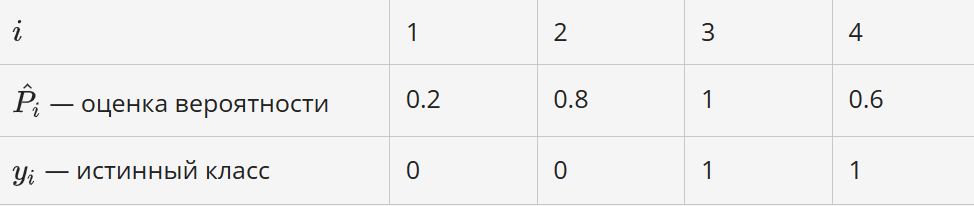



Подсчитаем, чему равна функция правдоподобия при данных предсказаниях вероятностей:

$lieklihood = \sum \limits_i^n(y_ilog(\hat P_i) + (1 - y_i)log(1 - \hat P)) = ((0 log (0.2) + (1 - 0) log (1 - 0.2)) + (0 log (0.8) + (1 - 0) log (1 - 0.8)) + (1 log (1) + (1 - 1) log (1 -1)) + (1 log (0.6) + (1 - 1) log (1 - 0.6))) = (log(0.8) + log(0.2) + log(1) + log(0.6)) = -2.34$

Такие расчёты можно производить для любых значений параметров, меняется только оценка вероятности $\hat P_i$.

Примечание. К сожалению, функция likelihood не имеет интерпретации, то есть нельзя сказать, что значит число -2.34 в контексте правдоподобия.

Цель — найти такие параметры, при которых наблюдается максимум этой функции.

Теперь пора снова применить магию математики, чтобы привести задачу к привычному нам формату минимизации эмпирического риска. По правилам оптимизации, если поставить перед функцией минус, то задача оптимизации меняется на противоположную: был поиск максимума — станет поиском минимума.

Таким образом мы получим функцию потерь $L(w)$, которая носит название **«функция логистических потерь»**, или **logloss**. Также часто можно встретить название **кросс-энтропия**, или **cross-entropy loss**:

$L(w) = loglos = - \sum \limits_i^n(y_ilog(\hat P_i) + (1-y_i)log(1 - \hat P_i)) \rightarrow \min_w$

$\hat P_i = {1 \over {1 + e^{-w_0- \sum^m_{j=1}w_yx_j}}}$

Во избежание переобучения модели в функцию потерь логистической регрессии традиционно добавляется **регуляризация**. В реализации логистической регрессии в sklearn она немного отличается от той, что мы видели ранее для линейной регрессии.

При L1-регуляризации мы добавляем в функцию потерь $L(w)$ штраф из суммы модулей параметров, а саму функцию logloss умножаем на коэффициент $C$:

$L(w) = C \cdot \log loss + \sum \limits^m_{j=1}|w_j| \rightarrow \min \limits_w$

А при L2-регуляризации — штраф из суммы квадратов параметров:

$L(w) = C \cdot \log loss + \sum \limits^m_{j=1}(w_j)^2 \rightarrow \min \limits_w$

Значение коэффициента $C$ — коэффициент, обратный коэффициенту регуляризации. Чем **больше** $C$, тем **меньше** «сила» регуляризации.

Предлагаем вам посмотреть на то, как будет меняться форма сигмоиды, разделяющей плоскости при минимизации функции потерь logloss (она обозначена как cross-entropy в виде концентрических кругов — вид сверху), с помощью обычного градиентного спуска (не стохастического) в виде анимации.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/bfdf530906dbc60202d51e4233e10185/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-2_12.gif)

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/dd3061bf76c343ce85ae577b688d7be9/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-2_13.gif)

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/a8a14407d575891d483ae85fc714243f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-2_14.gif)

<center> ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ В SKLEARN